In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors


In [365]:
df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13 = 'df_1','df_2','df_3','df_4','df_5','df_6','df_7','df_8','df_9','df_10','df_11','df_12','df_13'
def data_base(p):
    if 'df_1' == p:
        # (1) Penetración de Internet fijo (accesos por cada 100 hogares).
        df_1 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/275028/data.csv', decimal= ',')
        return df_1
    if 'df_2' == p:
        # (2) Serie trimestral de accesos a Internet fijo por tecnología.
        df_2 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/275029/data.csv')
        return df_2
    if 'df_3' == p:
        # (3) Acceso a Internet fijo por tecnología y provincia.
        df_3 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/255796/data.csv')
        return df_3
    if 'df_4' == p:
        # (4) Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.
        df_4 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/275026/data.csv')
        return df_4
    if 'df_5' == p:
        # (5) Distribución de los accesos totales nacionales a Internet fijo por velocidad.
        df_5 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/280921/data.csv')
        return df_5
    if 'df_6' == p:
        # (6) Ingresos trimestrales por la prestación del servicio de Internet fijo.
        df_6 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/275023/data.csv')
        return df_6
    if 'df_7' == p:
        # (7) Accesos a Internet fijo por velocidad de bajada y localidad.
        df_7 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/277617/data.csv')
        return df_7
    if 'df_8' == p:
        # (8) Accesos a Internet fijo por tecnología y localidad.
        df_8 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/279175/data.csv')
        return df_8
    if 'df_9' == p:
        # (9) Listado de localidades con conectividad a internet.
        df_9 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/275022/data.csv')
        return df_9
    if 'df_10' == p:
        # (10) Conectividad al servicio de Internet.
        df_10 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/277615/data.csv', decimal= ',')
        return df_10
    if 'df_11' == p:
        # (11) Velocidad media de bajada de Internet fijo por provincia.
        df_11 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/290237/data.csv')
        return df_11
    if 'df_12' == p:
        # (12) Ubicacion geografica de cada provincia Argentina.
        df_12 = pd.read_csv('https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.7/download/provincias.csv')
        return df_12
    if 'df_13' == p:
        # (12) Distribucion de Hogares Argentina.
        df_13 = pd.read_csv('reporte.csv')
        return df_13

In [ ]:
# Crear el DataFrame para la visualizacion del KPI Penetración de Internet fijo (accesos por cada 100 hogares).

df_1 = data_base(df_1)
df_1 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/275028/data.csv', decimal= ',')
df_12 = pd.read_csv('https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.7/download/provincias.csv')
df_1 = df_1.sort_values('Provincia')
df_12 = df_12[['centroide_lat','centroide_lon','nombre']].sort_values('nombre')
df_12 = pd.DataFrame(df_12.values.repeat(35,axis=0))
df_1['ind']=[i for i in range(840)]
df_1 = df_1.set_index('ind')
df_1_Ubicacion = pd.concat([df_1, df_12], axis=1)
df_1_Ubicacion = df_1_Ubicacion.drop(2, axis=1)
df_1_Ubicacion = df_1_Ubicacion.rename({0: 'Latitud',1:'Longitud'}, axis=1)
df_1_Ubicacion = df_1_Ubicacion[df_1_Ubicacion['Año']==2022].groupby('Provincia',as_index=False).max()[['Provincia','Accesos por cada 100 hogares','Latitud','Longitud']]

In [4]:
# Crear el DataFrame que cocatena la columna trimestre con año.

df_1_Trimestre = data_base(df_1)
df_1_Trimestre[['Año','Trimestre']] = df_1_Trimestre[['Año','Trimestre']].astype('str')
df_1_Trimestre['Trimestre'] = df_1_Trimestre['Año'] + df_1_Trimestre['Trimestre'] 
df_1_Trimestre[['Año','Trimestre']] = df_1_Trimestre[['Año','Trimestre']].astype('int64')

In [166]:
df_1_Trimestre.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,20223,Buenos Aires,78.11
1,2022,20223,Capital Federal,122.28
2,2022,20223,Catamarca,65.33
3,2022,20223,Chaco,43.86
4,2022,20223,Chubut,84.38


In [6]:
# DataFrame que ordena de mayor a menor el acceso por provincia del ultimo trimestre.

df_1_PT = df_1_Trimestre[df_1_Trimestre['Trimestre']==20223][['Provincia','Accesos por cada 100 hogares']].sort_values(by='Accesos por cada 100 hogares', ascending= False, ignore_index=True)
print(df_1_PT)

              Provincia  Accesos por cada 100 hogares
0       Capital Federal                        122.28
1      Tierra Del Fuego                         99.51
2              La Pampa                         96.59
3               Córdoba                         88.31
4                Chubut                         84.38
5              San Luis                         81.74
6              La Rioja                         80.66
7               Neuquén                         80.37
8              Santa Fe                         78.55
9          Buenos Aires                         78.11
10            Río Negro                         67.98
11            Catamarca                         65.33
12           Entre Ríos                         63.67
13              Tucumán                         61.14
14                Jujuy                         58.91
15                Salta                         57.76
16             Misiones                         51.82
17              Mendoza     

In [7]:
# Describe() del ultimo trimestre de acceso a hogares por provincia.

df_1_Trimestre[df_1_Trimestre['Trimestre']==20223][['Provincia','Accesos por cada 100 hogares']].sort_values(by='Accesos por cada 100 hogares', ascending= False).describe()

,Accesos por cada 100 hogares
count,24.000000
mean,68.580833
std,20.672624
min,43.190000
25%,50.972500
50%,64.500000
75%,80.930000
max,122.280000


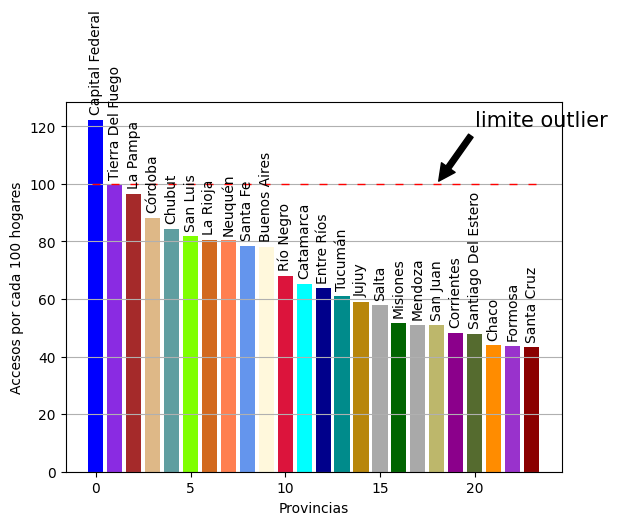

In [8]:
# Grafica del ultimo trimestre por provincia.

def acceso_por_provincia():

    x = df_1_PT.index
    y = df_1_PT['Accesos por cada 100 hogares']
    colores = [i for i in mcolors.cnames][9:33]

    for i in range(24):
        plt.annotate(str(df_1_PT['Provincia'][i]),xy=(x[i],y[i]),xytext=(x[i],y[i]+3),ha= 'center',rotation= 90)
    plt.xlabel("Provincias")
    plt.ylabel("Accesos por cada 100 hogares")
    plt.bar(x,y, label= df_1_PT['Provincia']+ ["  (" for i in range(24)] +df_1_PT.index.astype(str)+ [")" for i in range(24)],color= colores)
    plt.grid(axis = 'y')
    plt.plot(x,np.array([100]*24),'r_')
    plt.annotate('limite outlier',(18,100),xytext=(20,120),arrowprops=dict(facecolor='black', shrink=0.05),size=15)
    
    return plt.show()
acceso_por_provincia()

In [9]:
df_13 = data_base(df_13)

In [10]:
# Transformar el data frame df_13.

df_13['Casa Tipo A'] = df_13['Casa Tipo A']+df_13['Casa Tipo B']
df_13['Rancho'] = df_13['Rancho']+df_13['Casilla']
df_13['Pieza en inquilinato'] = df_13['Pieza en inquilinato']+df_13['Pieza en hotel familiar o pensión']+df_13['Local no construido para habitación']
df_13.drop(['Casa Tipo B','Casilla','Pieza en hotel familiar o pensión','Local no construido para habitación'],axis=1,inplace=True)
df_13 = df_13.rename(columns= {'Unnamed: 0':'Provincia','Pieza en inquilinato':'Pension','Casa Tipo A':'Casa'})


In [11]:
df_13.head()

,Provincia,Casa,Rancho,Departamento,Pension,Vivienda móvil,Total
0,Ciudad Autónoma de Buenos Aires,280314,3016,818341,48364,99,1150134
1,Buenos Aires,4021102,161053,571272,34526,1531,4789484
2,Catamarca,89655,2672,2909,720,45,96001
3,Córdoba,885651,9422,129774,6504,492,1031843
4,Corrientes,226083,22281,15455,3728,250,267797


In [12]:
# Pasar df_13 a porcentajes.
df_13_porcentaje = df_13
def porcentajes_df_13(p):
    for i in p:
        df_13_porcentaje[i] = round((df_13[i]/df_13['Total'])*100,1)
    return 

porcentajes_df_13(['Casa','Rancho','Departamento','Pension','Vivienda móvil'])

In [13]:
df_13_porcentaje.loc[0,'Provincia'] = 'Capital Federal'
df_13_porcentaje.head()

,Provincia,Casa,Rancho,Departamento,Pension,Vivienda móvil,Total
0,Capital Federal,24.4,0.3,71.2,4.2,0.0,1150134
1,Buenos Aires,84.0,3.4,11.9,0.7,0.0,4789484
2,Catamarca,93.4,2.8,3.0,0.7,0.0,96001
3,Córdoba,85.8,0.9,12.6,0.6,0.0,1031843
4,Corrientes,84.4,8.3,5.8,1.4,0.1,267797


In [14]:
# Eliminar la columna total de df_13_porcentaje.

df_13_porcentaje.drop('Total',axis=1,inplace=True)

In [15]:
df_13_porcentaje.describe()

,Casa,Rancho,Departamento,Pension,Vivienda móvil
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,82.520833,4.787500,11.445833,1.187500,0.062500
std,13.207178,3.455092,13.420781,0.886278,0.049454
min,24.400000,0.300000,2.900000,0.400000,0.000000
25%,83.600000,2.175000,5.600000,0.575000,0.000000
50%,84.600000,3.400000,8.650000,1.000000,0.100000
75%,87.050000,7.025000,12.650000,1.425000,0.100000
max,93.400000,11.800000,71.200000,4.200000,0.100000


In [16]:
df_casa_depto = df_13_porcentaje[['Provincia','Casa','Departamento']]

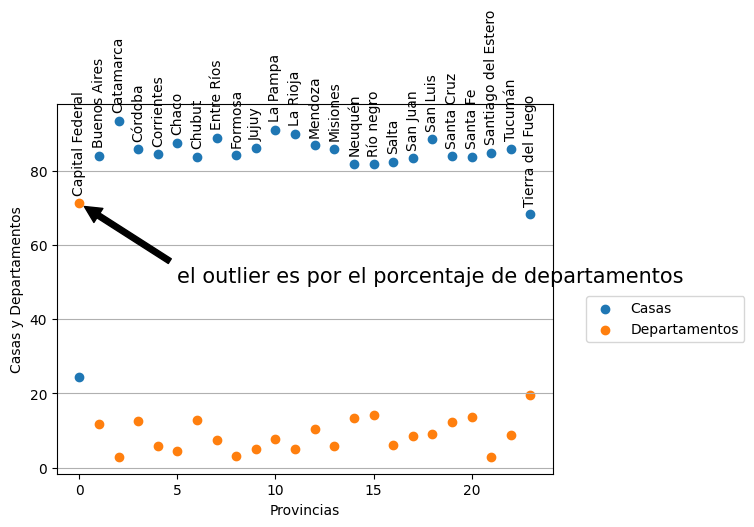

In [17]:
# Grafica del porcentaje de casas y departamentos por provincia.

def casas_deptos_por_provincia():
    
    #plot1
    x = df_casa_depto.index
    y = df_casa_depto['Casa']
    for i in range(1,24):
        plt.annotate(str(df_casa_depto['Provincia'][i]),xy=(x[i],y[i]),xytext=(x[i],y[i]+3),ha= 'center',rotation= 90)
    plt.scatter(x,y)
    
    #plot2
    x = df_casa_depto.index
    y = df_casa_depto['Departamento']
    plt.annotate(str(df_casa_depto['Provincia'][0]),xy=(x[0],y[0]),xytext=(x[0],y[0]+3),ha= 'center',rotation= 90)
    plt.xlabel("Provincias")
    plt.ylabel("Casas y Departamentos")
    plt.scatter(x,y)
    plt.grid(axis = 'y')
    plt.legend(['Casas','Departamentos'],bbox_to_anchor=(1.4,0.5))
    plt.annotate('el outlier es por el porcentaje de departamentos',(0,71.2),xytext=(5,50),arrowprops=dict(facecolor='black', shrink=0.05),size=15)

    return plt.show()
casas_deptos_por_provincia()

In [30]:
# Pasar a porcentajes la base de datos de acceso a la tecnologia por provincia y luego analizarla.

df_3 = data_base(df_3)

In [101]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    float64
 4   Cablemodem    840 non-null    float64
 5   Fibra_optica  840 non-null    float64
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    float64
dtypes: float64(6), object(3)
memory usage: 59.3+ KB


In [94]:
df_3 = df_3.astype({'Wireless':'str','Otros':'str'})

In [97]:
df_3.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [74]:
df_3 = df_3.rename(columns={'Fibra óptica':'Fibra_optica'})

In [100]:
df_3 = df_3.astype({'ADSL':'float64','Cablemodem':'float64','Fibra_optica':'float64','Wireless':'float64','Otros':'float64','Total':'float64'})

In [96]:
df_3['Cablemodem']=df_3.Cablemodem.str.replace('.','')
df_3['ADSL']=df_3.ADSL.str.replace('.','')
df_3['Wireless']=df_3.Wireless.str.replace('.','')
df_3['Fibra_optica']=df_3.Fibra_optica.str.replace('.','')
df_3['Otros']=df_3.Otros.str.replace('.','')
df_3['Total']=df_3.Total.str.replace('.','')

In [103]:
# Porcentajes del ultimo trimestre.

df_3_trimestre_ultimo = df_3[df_3.index <= 23][['Provincia','ADSL','Cablemodem','Fibra_optica','Wireless','Otros','Total']]

In [105]:
df_3_trimestre_ultimo.head()

,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total
0,Buenos Aires,339648.0,2748325.0,1436433.0,126846.0,70416.0,4721668.0
1,Capital Federal,140791.0,1240125.0,129218.0,5758.0,31787.0,1547679.0
2,Catamarca,10010.0,10495.0,46224.0,1329.0,2235.0,70293.0
3,Chaco,27164.0,61800.0,44645.0,8178.0,2359.0,144146.0
4,Chubut,45377.0,72212.0,9574.0,29784.0,8831.0,165778.0


In [106]:
def porcentajes_df_3(p):
    for i in p:
        df_3_trimestre_ultimo[i] = round((df_3_trimestre_ultimo[i]/df_3_trimestre_ultimo['Total'])*100,1)
    return 

In [107]:
porcentajes_df_3(['ADSL','Cablemodem','Fibra_optica','Wireless','Otros'])

In [109]:
df_3_trimestre_ultimo.drop(columns='Total',inplace=True)

In [129]:
df_3_trimestre_ultimo.head()

,Provincia,ADSL,Cablemodem,Fibra_optica,Wireless,Otros
0,Buenos Aires,7.2,58.2,30.4,2.7,1.5
1,Capital Federal,9.1,80.1,8.3,0.4,2.1
2,Catamarca,14.2,14.9,65.8,1.9,3.2
3,Chaco,18.8,42.9,31.0,5.7,1.6
4,Chubut,27.4,43.6,5.8,18.0,5.3


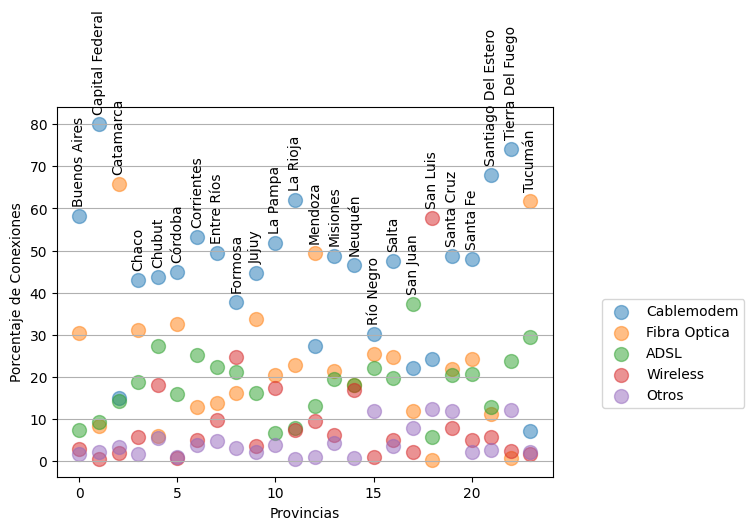

In [165]:
# Grafica del porcentaje del tipo de tecnologia por provincia.

def tecnologia_por_provincia():
    
    #plot1
    x1 = df_3_trimestre_ultimo.index
    y1= df_3_trimestre_ultimo['Cablemodem']
    for i in [0,1,3,4,5,6,7,8,9,10,11,13,14,15,16,19,20,21,22]:
        plt.annotate(str(df_3_trimestre_ultimo['Provincia'][i]),xy=(x1[i],y1[i]),xytext=(x1[i],y1[i]+3),ha= 'center',rotation= 90)
    plt.scatter(x1,y1,alpha=0.5,s=100)

    #plot5
    x5 = df_3_trimestre_ultimo.index
    y5 = df_3_trimestre_ultimo['Fibra_optica']
    for i in [2,12,23]:
        plt.annotate(str(df_3_trimestre_ultimo['Provincia'][i]),xy=(x5[i],y5[i]),xytext=(x5[i],y5[i]+3),ha= 'center',rotation= 90)
    plt.scatter(x5,y5,alpha=0.5,s=100)
    
    #plot2
    x2 = df_3_trimestre_ultimo.index
    y2 = df_3_trimestre_ultimo['ADSL']
    plt.annotate(str(df_3_trimestre_ultimo['Provincia'][17]),xy=(x2[17],y2[17]),xytext=(x2[17],y2[17]+3),ha= 'center',rotation= 90)
    plt.scatter(x2,y2,alpha=0.5,s=100)

    #plot3
    x3 = df_3_trimestre_ultimo.index
    y3 = df_3_trimestre_ultimo['Wireless']
    plt.annotate(str(df_3_trimestre_ultimo['Provincia'][18]),xy=(x3[18],y3[18]),xytext=(x3[18],y3[18]+3),ha= 'center',rotation= 90)
    plt.scatter(x3,y3,alpha=0.5,s=100)

    #plot4
    x4 = df_3_trimestre_ultimo.index
    y4 = df_3_trimestre_ultimo['Otros']
    plt.scatter(x4,y4,alpha=0.5,s=100)

    plt.xlabel("Provincias")
    plt.ylabel("Porcentaje de Conexiones")
    plt.grid(axis = 'y')
    plt.legend(['Cablemodem','Fibra Optica','ADSL','Wireless','Otros'],bbox_to_anchor=(1.4,0.5))

    return plt.show()
tecnologia_por_provincia()

In [205]:
df_Nacional_Acces_Internet = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/281491/data.csv')

In [209]:
df_Nacional_Acces_Internet.head()

,Año,Trimestre,Accesos_por_cada_100_hogares,Accesos por cada 100 hab,Periodo
0,2022,3,76.64,"23,95",Jul-Sept 2022
1,2022,2,75.97,"23,72",Abr-Jun 2022
2,2022,1,73.88,"23,05",Ene-Mar 2022
3,2021,4,73.18,"22,81",Oct-Dic 2021
4,2021,3,70.58,"21,98",Jul-Sept 2021


In [213]:
df_Nacional_Acces_Internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos_por_cada_100_hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     object 
 4   Periodo                       35 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ KB


In [207]:
df_Nacional_Acces_Internet.rename(columns={'Accesos por cada 100 hogares':'Accesos_por_cada_100_hogares'},inplace=True)

In [208]:
df_Nacional_Acces_Internet['Accesos_por_cada_100_hogares'] = df_Nacional_Acces_Internet.Accesos_por_cada_100_hogares.str.replace(',','.')

In [212]:
df_Nacional_Acces_Internet = df_Nacional_Acces_Internet.astype({'Accesos_por_cada_100_hogares':'float64'})

In [260]:
variacion = []

for i in range(33):
    
    variacion.append(round(df_Nacional_Acces_Internet['Accesos_por_cada_100_hogares'][i]-df_Nacional_Acces_Internet['Accesos_por_cada_100_hogares'][i+1],2))
    

In [261]:
print(variacion)

[0.67, 2.09, 0.7, 2.6, 1.34, 1.29, 0.33, 1.31, 2.1, 1.35, -0.06, -2.87, 1.26, 2.05, 1.06, 0.73, 1.53, 0.34, 1.04, 0.88, 2.0, 0.74, 0.22, 0.21, 0.39, 1.49, -0.78, 0.17, 0.7, 0.4, 0.86, -0.17, 0.81]


In [279]:
df_variacion = pd.DataFrame({'Variacion':variacion})

In [290]:
df_variacion = df_variacion.sort_index(ascending=False, ignore_index=True)

In [292]:
df_variacion.head()

,Variacion
0,0.81
1,-0.17
2,0.86
3,0.40
4,0.70


In [295]:
df_variacion.describe()

,Variacion
count,33.000000
mean,0.811515
std,0.993347
min,-2.870000
25%,0.340000
50%,0.810000
75%,1.340000
max,2.600000


In [366]:
df_Internet_Tecnologia = data_base(df_2)

In [367]:
df_Internet_Tecnologia.describe()

,Año,Trimestre,Wireless,Otros
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,248.280029,147.431086
std,2.564135,1.120474,174.354293,85.868717
min,2014.000000,1.000000,70.749000,54.300000
25%,2016.000000,1.500000,85.107500,62.763500
50%,2018.000000,2.000000,194.267000,100.554000
75%,2020.000000,3.000000,394.963000,247.918500
max,2022.000000,4.000000,557.110000,265.328000


In [374]:
df_Internet_Tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,25.9,557.110,235.230,11091128.0,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,24.9,556.243,231.609,10958684.0,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,20.9,545.814,251.996,10624009.0,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,19.8,523.107,252.596,10489794.0,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,15.5,492.415,250.190,10085541.0,Jul-Sept 2021


In [369]:
df_Internet_Tecnologia.rename(columns={'Fibra óptica':'Fibra_optica'},inplace=True)

In [371]:
df_Internet_Tecnologia['Fibra_optica'] = df_Internet_Tecnologia.Fibra_optica.str.replace('.','')
df_Internet_Tecnologia['Total'] = df_Internet_Tecnologia.Total.str.replace('.','')

In [372]:
df_Internet_Tecnologia = df_Internet_Tecnologia.astype({'Fibra_optica':'float64'})
df_Internet_Tecnologia = df_Internet_Tecnologia.astype({'Total':'float64'})

In [373]:
df_Internet_Tecnologia['Fibra_optica'] = round((df_Internet_Tecnologia['Fibra_optica'] / df_Internet_Tecnologia['Total'])*100,1)

In [375]:
variacion_fibra = []

for i in range(33):
    
    variacion_fibra.append(round(df_Internet_Tecnologia['Fibra_optica'][i]-df_Internet_Tecnologia['Fibra_optica'][i+1],2))

In [376]:
df_variacion_fibra = pd.DataFrame({'Variacion_fibra':variacion_fibra})

In [377]:
df_variacion_fibra = df_variacion_fibra.sort_index(ascending=False, ignore_index=True)

In [378]:
df_variacion['variacion_fibra'] = df_variacion_fibra['Variacion_fibra']

In [379]:
df_variacion.head()

,Variacion,variacion_fibra
0,0.81,0.1
1,-0.17,-0.1
2,0.86,0.2
3,0.40,-0.3
4,0.70,0.1


In [402]:
def grafica_acceso_nacional():
    x = df_variacion.index
    y = df_variacion['Variacion']
    for i in range(33):
        plt.annotate(str(df_variacion['Variacion'][i]),xy=(x[i],y[i]),xytext=(x[i],y[i]+0.15),ha= 'center',rotation= 45)

    plt.scatter(x,y)
    plt.plot(x,y)

    x1 = df_variacion.index
    y1 = df_variacion['variacion_fibra']
    for i in range(33):
        plt.annotate(str(df_variacion['variacion_fibra'][i]),xy=(x1[i],y1[i]),xytext=(x1[i],y1[i]+0.15),ha= 'center',rotation= 45)

    plt.scatter(x1,y1)
    plt.plot(x1,y1)

    plt.annotate('incremento de fibra es directamente proporcional al de usuarios',(29,4.3),xytext=(0,-2),arrowprops=dict(facecolor='black', shrink=0.05),size=15)
    plt.annotate('incremento de fibra es directamente proporcional al de usuarios',(31,4.0),xytext=(0,-2),arrowprops=dict(facecolor='black', shrink=0.05),size=15)

    return plt.show()

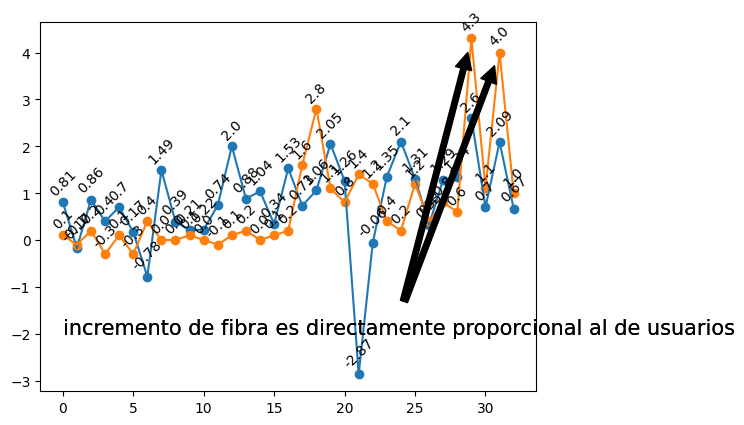

In [403]:
grafica_acceso_nacional()

In [404]:
df_6 = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/275023/data.csv')

In [407]:
df_6.head()

,Año,Trimestre,Ingresos_miles_de_pesos,Periodo
0,2022,3,67055930,Jul-Sept 2022
1,2022,2,60335724,Abr-Jun 2022
2,2022,1,55589997,Ene-Mar 2022
3,2021,4,45467887,Oct-Dic 2021
4,2021,3,42999944,Jul-Sept 2021


In [406]:
df_6.rename(columns={'Ingresos (miles de pesos)':'Ingresos_miles_de_pesos'},inplace=True)
df_6['Ingresos_miles_de_pesos'] = df_6.Ingresos_miles_de_pesos.str.replace('.','')

In [408]:
df_6 = df_6.astype({'Ingresos_miles_de_pesos':'float64'})

In [409]:
variacion_ingresos = []

for i in range(33):
    
    variacion_ingresos.append(round(df_6['Ingresos_miles_de_pesos'][i]-df_6['Ingresos_miles_de_pesos'][i+1],2))

df_variacion_ingresos = pd.DataFrame({'Variacion_Ingresos':variacion_ingresos})

df_variacion_ingresos = df_variacion_ingresos.sort_index(ascending=False, ignore_index=True)

In [411]:
df_variacion_ingresos.tail()

,Variacion_Ingresos
28,4760277.0
29,2467943.0
30,10122110.0
31,4745727.0
32,6720206.0
